In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [25]:
data = pd.read_csv("academic_performance_dataset_V2.csv")

In [16]:
data.head()

,ID No,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
0,42308,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13
1,70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02
2,31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19
3,63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19
4,30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24


In [17]:
data.shape

(3046, 10)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3046 entries, 0 to 3045
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID No      3046 non-null   int64  
 1   Prog Code  3046 non-null   object 
 2   Gender     3046 non-null   object 
 3   YoG        3046 non-null   int64  
 4   CGPA       3046 non-null   float64
 5   CGPA100    3046 non-null   float64
 6   CGPA200    3046 non-null   float64
 7   CGPA300    3046 non-null   float64
 8   CGPA400    3046 non-null   float64
 9   SGPA       3046 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 238.1+ KB


In [19]:
data.describe()

,ID No,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
count,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000,3046.000000
mean,61082.817466,2012.183848,3.494813,3.636106,3.321687,3.418578,3.532508,3.119645
std,21256.532751,1.329104,0.691614,0.679256,0.782473,0.858518,0.802228,0.616151
min,23462.000000,2010.000000,1.520000,1.570000,1.170000,0.630000,0.000000,1.460000
25%,42654.250000,2011.000000,3.000000,3.180000,2.760000,2.810000,3.000000,2.660000
50%,61759.000000,2012.000000,3.560000,3.690000,3.340000,3.510000,3.620000,3.060000
75%,79236.250000,2013.000000,4.010000,4.150000,3.920000,4.100000,4.150000,3.570000
max,97563.000000,2014.000000,4.990000,5.000000,5.000000,5.000000,5.000000,4.930000


In [20]:
category=[]
numerical=[]
for column in data.columns:
    if data[column].nunique()>10:
        numerical.append(column)
    else:
        category.append(column)

In [21]:
category

['Gender', 'YoG']

In [22]:
numerical

['ID No',
 'Prog Code',
 'CGPA',
 'CGPA100',
 'CGPA200',
 'CGPA300',
 'CGPA400',
 'SGPA']

Text(0.5, 1.0, 'Gender ratio')

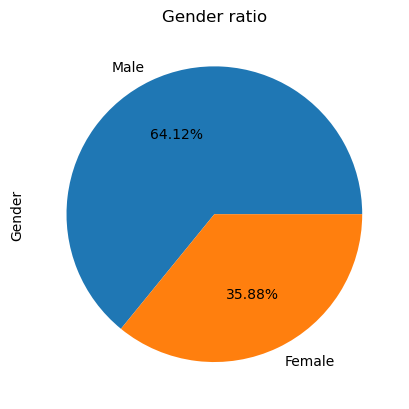

In [26]:
data['Gender'].value_counts().plot(kind="pie", autopct="%1.2f%%")
plt.title('Gender ratio')

Text(0.5, 1.0, 'Year of Graduating')

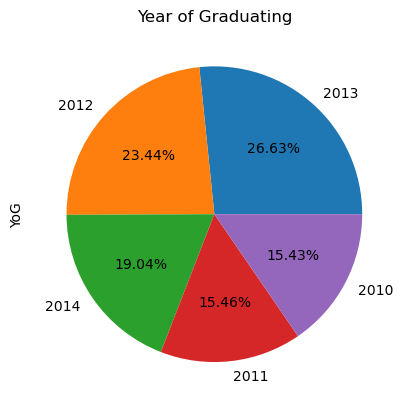

In [27]:
data['YoG'].value_counts().plot(kind="pie", autopct="%1.2f%%")
plt.title('Year of Graduating')

In [28]:
data['Gender'].value_counts()

Male      1953
Female    1093
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Academics according to gender')

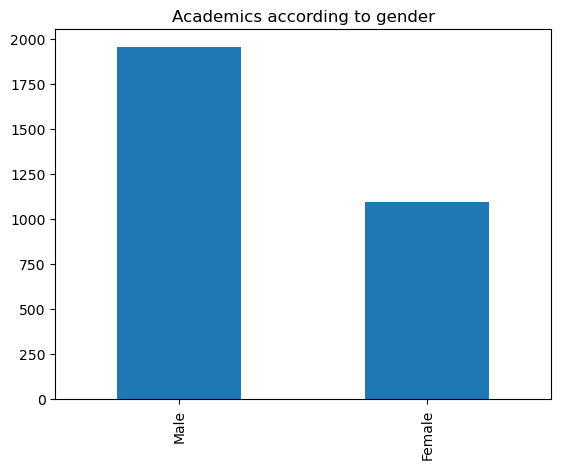

In [29]:
data['Gender'].value_counts().plot(kind="bar")
plt.title('Academics according to gender')

In [30]:
data['YoG'].value_counts()

2013    811
2012    714
2014    580
2011    471
2010    470
Name: YoG, dtype: int64

Text(0.5, 1.0, 'Years of Graduation')

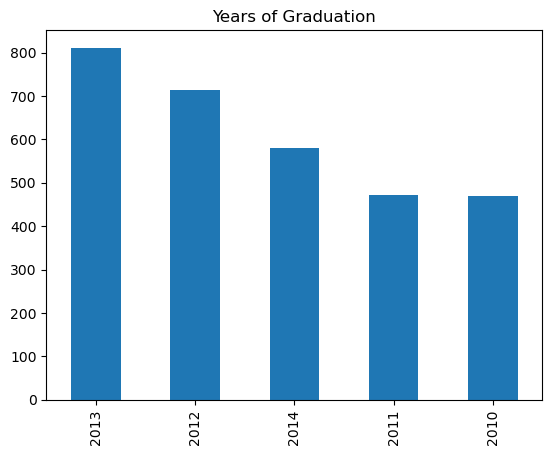

In [31]:
data['YoG'].value_counts().plot(kind="bar")
plt.title('Years of Graduation')

Text(0.5, 1.0, 'CGPA')

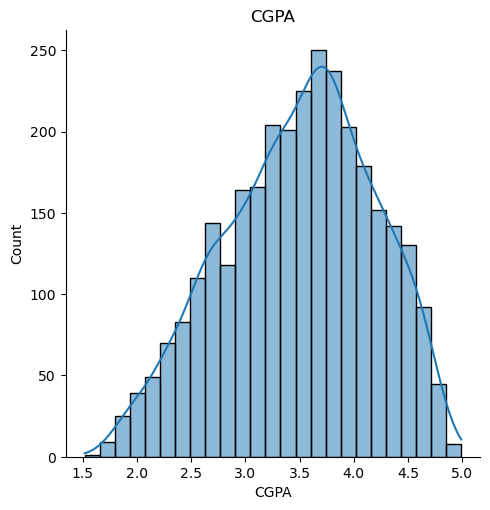

In [40]:
sns.displot(data['CGPA'], kde=True)
plt.title('CGPA')

Text(0.5, 1.0, 'CGPA')

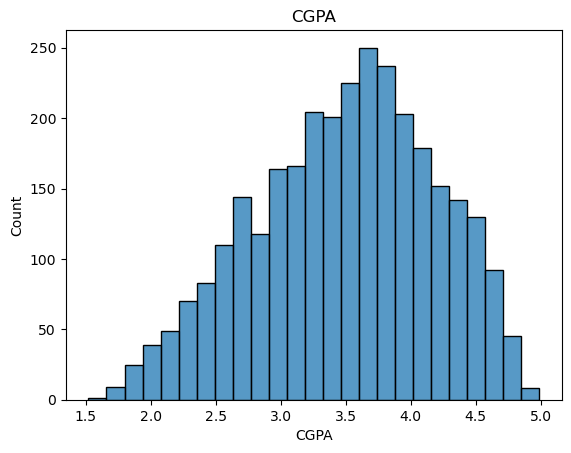

In [42]:
sns.histplot(data['CGPA'])
plt.title('CGPA')

Text(0.5, 1.0, 'SGPA')

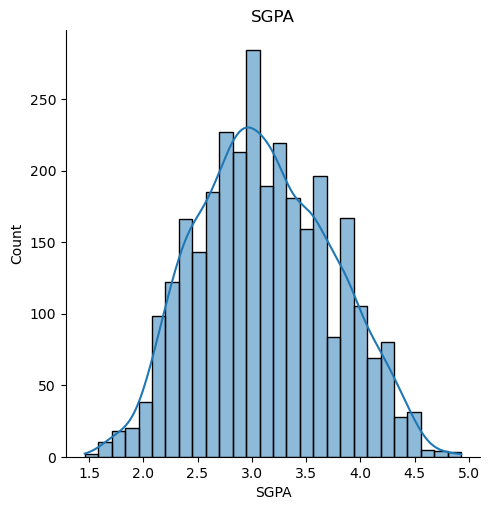

In [43]:
sns.displot(data['SGPA'], kde=True)
plt.title('SGPA')

In [47]:
data['CGPA'].skew()

-0.2549069209687609

In [48]:
data['SGPA'].skew()

0.150649710801843

In [49]:
data['CGPA100'].skew()

-0.36896961035757236

In [50]:
data['CGPA200'].skew()

-0.12545835272057054

Text(0.5, 1.0, 'Prog Code')

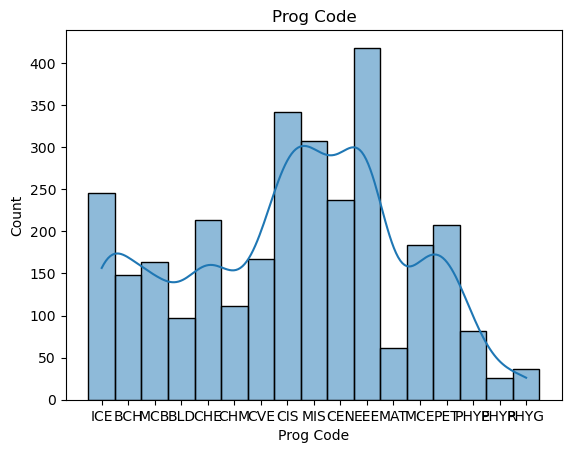

In [51]:
sns.histplot(data['Prog Code'], kde=True)
plt.title('Prog Code')

In [52]:
data['CGPA'].describe()

count    3046.000000
mean        3.494813
std         0.691614
min         1.520000
25%         3.000000
50%         3.560000
75%         4.010000
max         4.990000
Name: CGPA, dtype: float64

In [53]:
data['SGPA'].describe()

count    3046.000000
mean        3.119645
std         0.616151
min         1.460000
25%         2.660000
50%         3.060000
75%         3.570000
max         4.930000
Name: SGPA, dtype: float64

In [55]:
print("Median of all CGPA achieved- ",data['CGPA'].median())
print("Mode of all CGPA achieved- ",data['CGPA'].mode())

Median of all CGPA achieved-  3.56
Mode of all CGPA achieved-  0    3.27
1    3.73
Name: CGPA, dtype: float64


In [56]:
print("Median of all SGPA achieved- ",data['SGPA'].median())

Median of all SGPA achieved-  3.06


Text(0.5, 1.0, 'Box Plot of CGPA')

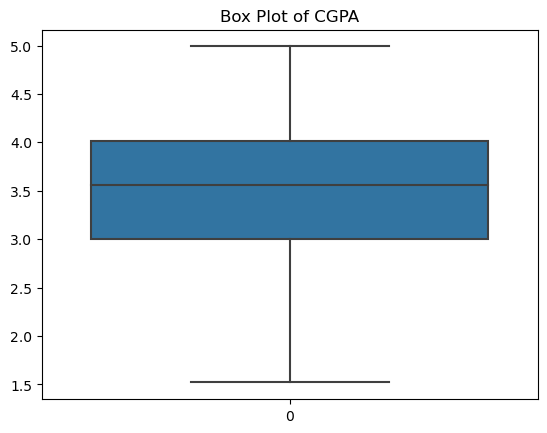

In [57]:
sns.boxplot(data['CGPA'])
plt.title('Box Plot of CGPA')

Text(0.5, 1.0, 'Box Plot of SGPA')

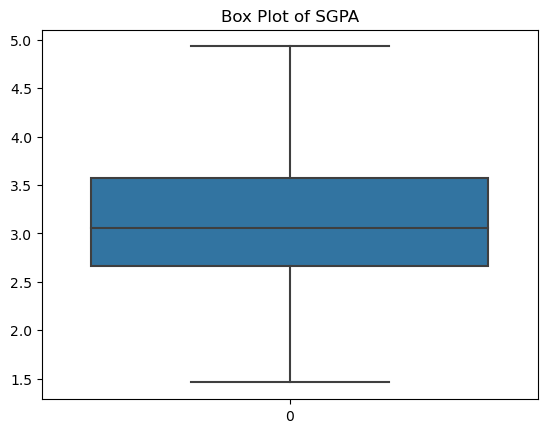

In [58]:
sns.boxplot(data['SGPA'])
plt.title('Box Plot of SGPA')

In [59]:
data['CGPA'].max()

4.99

In [60]:
data['SGPA'].max()

4.93

In [61]:
data['CGPA'].min()

1.52

In [62]:
data['SGPA'].min()

1.46

<Axes: xlabel='CGPA', ylabel='SGPA'>

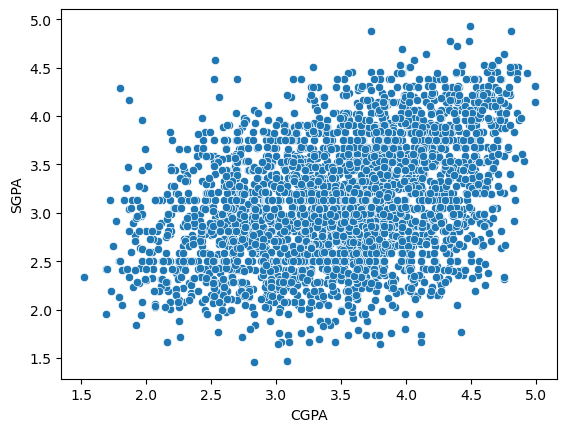

In [63]:
sns.scatterplot(data = data,x="CGPA", y="SGPA")

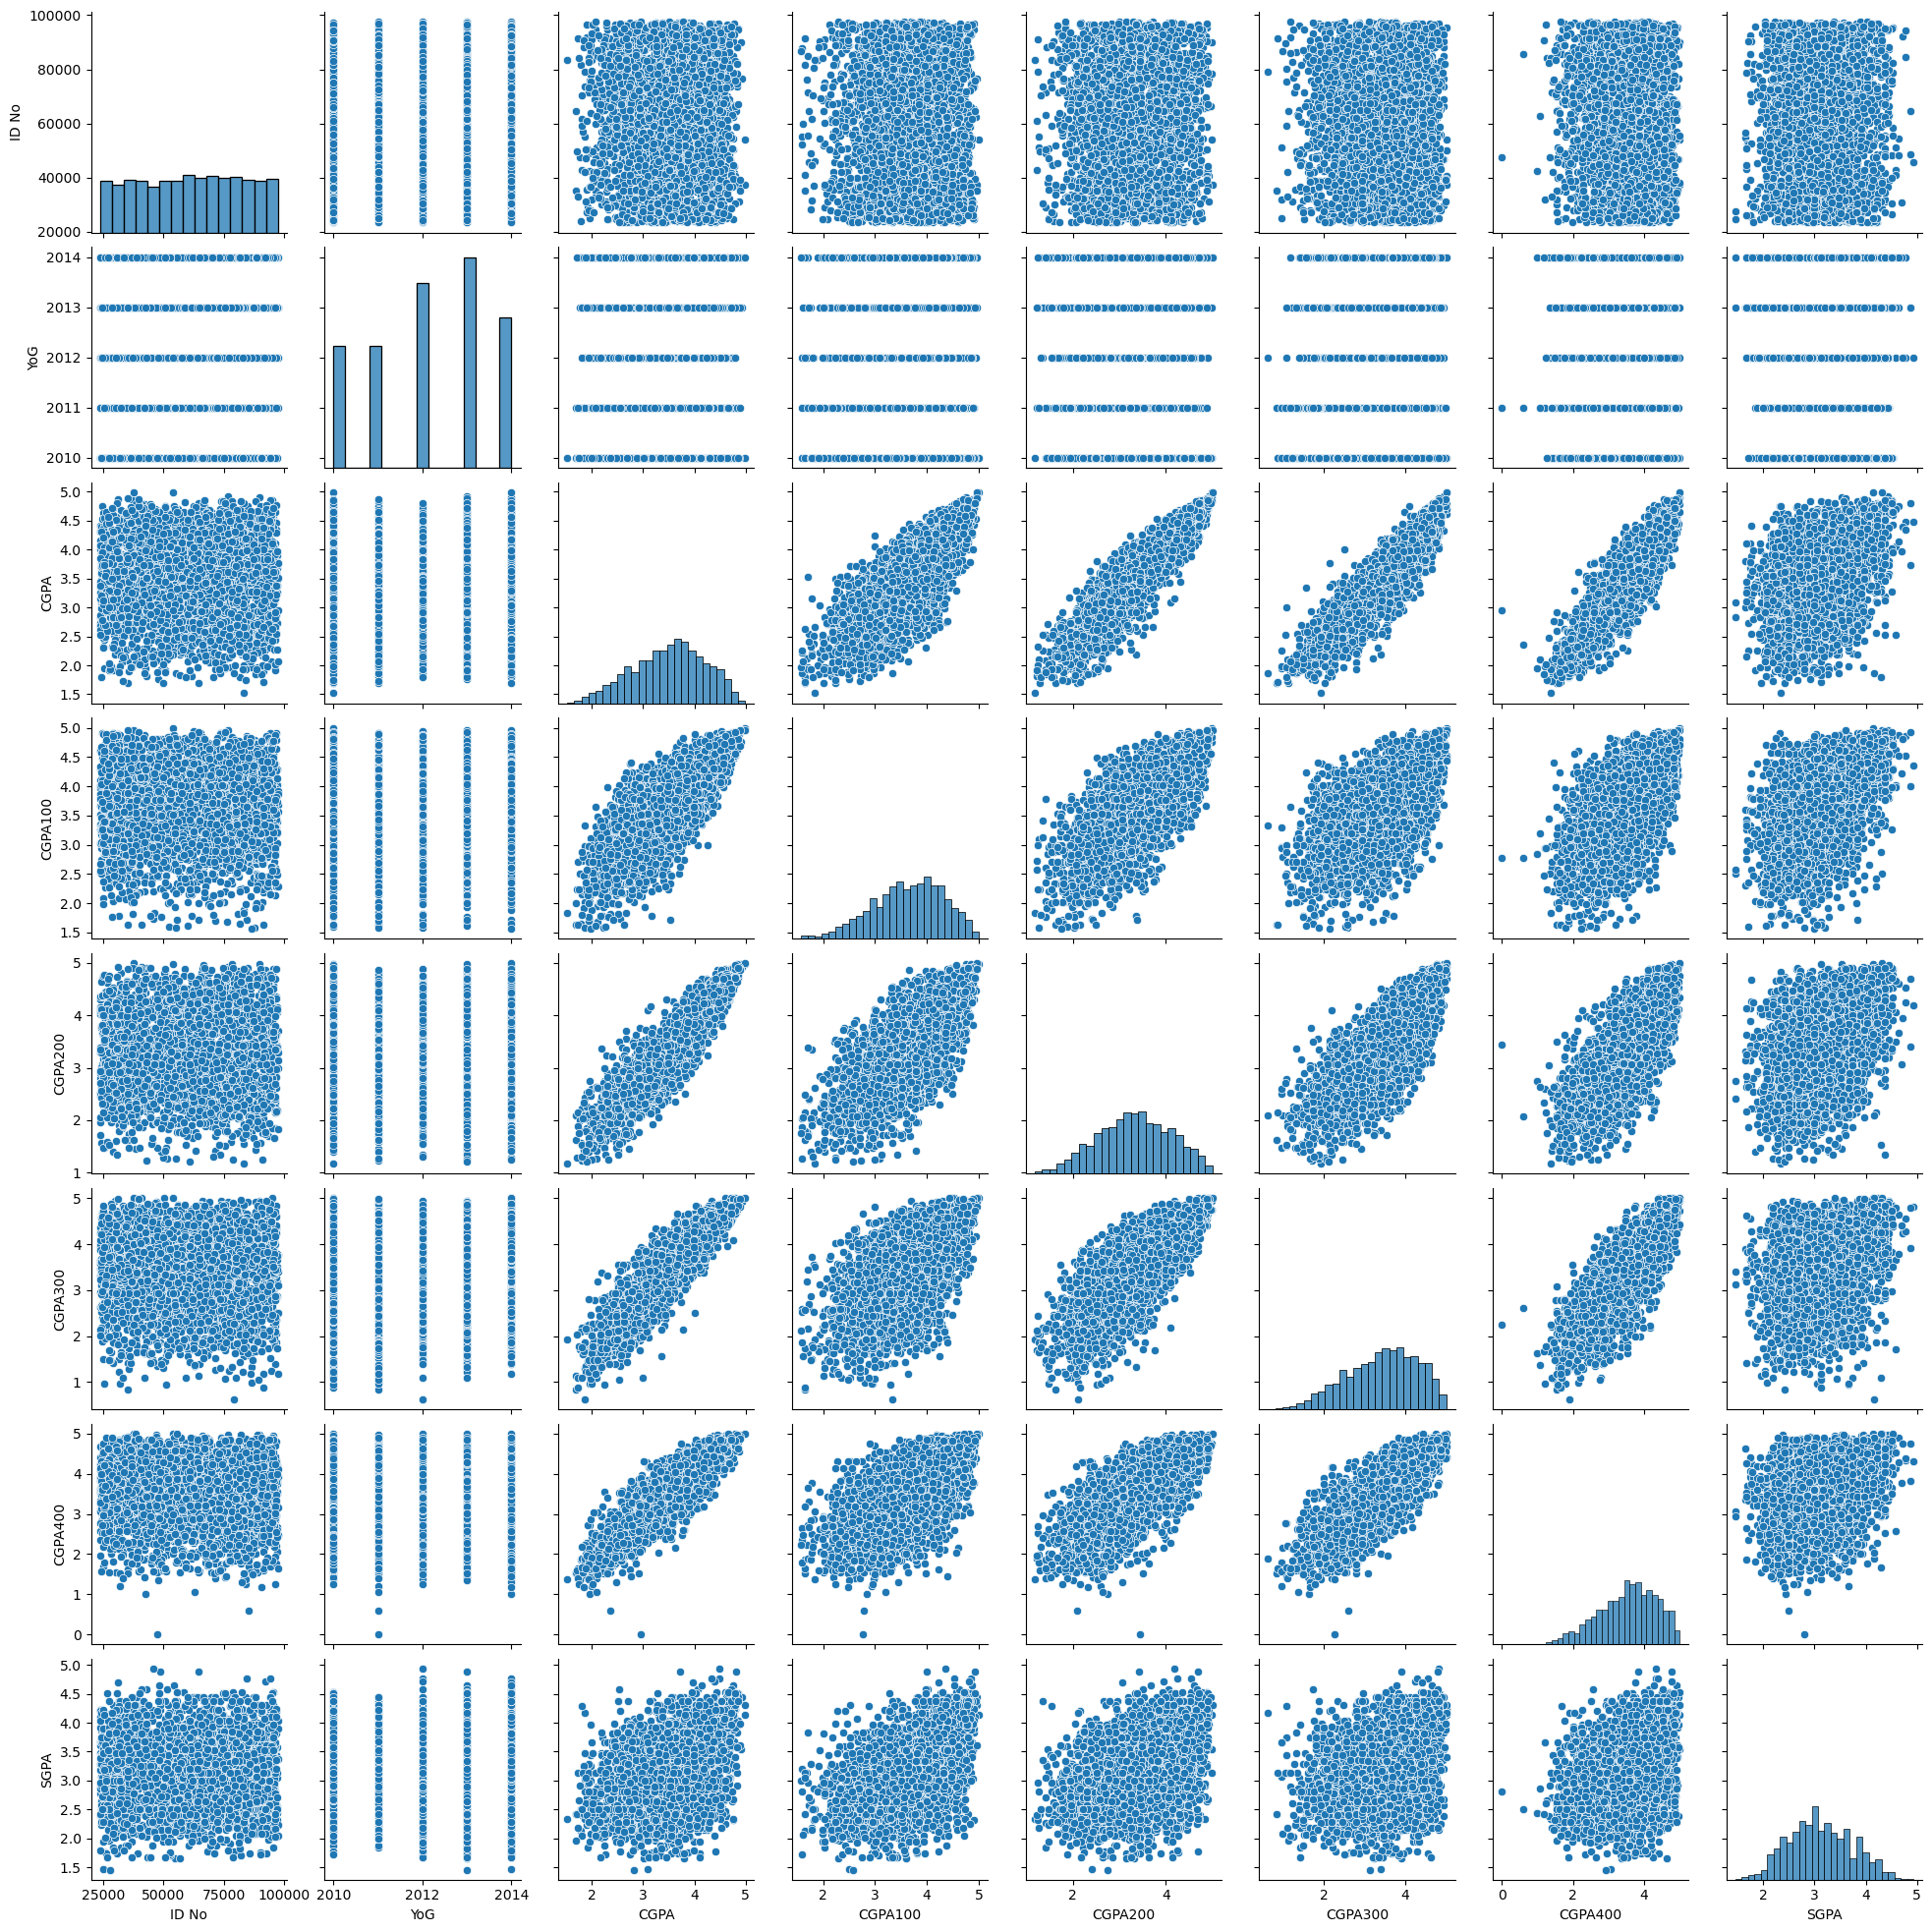

In [66]:
a = sns.pairplot(data)

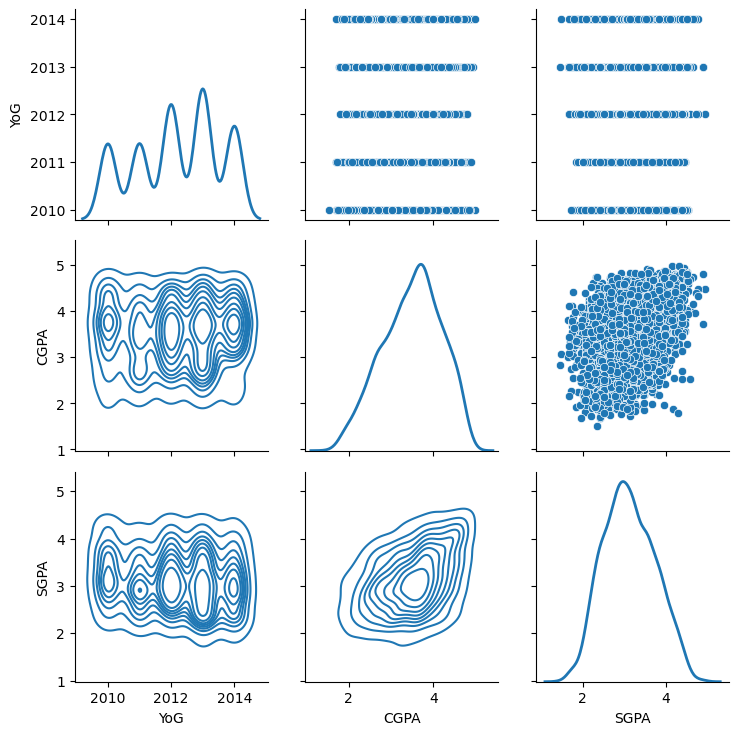

In [69]:
tr=data.drop(columns=['CGPA100', 'CGPA200', 'CGPA300', 'CGPA400', 'ID No'])
tr.dropna(axis=0, how='any')
a = sns.PairGrid(tr)
a = a.map_upper(sns.scatterplot)
a = a.map_lower(sns.kdeplot, colors="C0")
a = a.map_diag(sns.kdeplot, lw=2)

In [75]:
print(data.corr(numeric_only=True))

            ID No       YoG      CGPA   CGPA100   CGPA200   CGPA300   CGPA400  \
ID No    1.000000 -0.010005 -0.008673  0.005013  0.023332 -0.013209 -0.029279   
YoG     -0.010005  1.000000  0.040251  0.100879 -0.091117  0.061340  0.073587   
CGPA    -0.008673  0.040251  1.000000  0.792364  0.910676  0.906560  0.886461   
CGPA100  0.005013  0.100879  0.792364  1.000000  0.703889  0.598649  0.590058   
CGPA200  0.023332 -0.091117  0.910676  0.703889  1.000000  0.792281  0.736333   
CGPA300 -0.013209  0.061340  0.906560  0.598649  0.792281  1.000000  0.810704   
CGPA400 -0.029279  0.073587  0.886461  0.590058  0.736333  0.810704  1.000000   
SGPA     0.001796 -0.088181  0.379805  0.434993  0.344725  0.290820  0.303924   

             SGPA  
ID No    0.001796  
YoG     -0.088181  
CGPA     0.379805  
CGPA100  0.434993  
CGPA200  0.344725  
CGPA300  0.290820  
CGPA400  0.303924  
SGPA     1.000000  


In [79]:
x = data['CGPA'].to_numpy()
y = data['SGPA'].to_numpy()
np.corrcoef(x, y)

array([[1.        , 0.37980479],
       [0.37980479, 1.        ]])

In [80]:
pd.crosstab(data['Gender'],data['YoG'])

YoG,2010,2011,2012,2013,2014
Gender,,,,,
Female,147,205,260,272,209
Male,323,266,454,539,371


<Axes: xlabel='YoG', ylabel='Gender'>

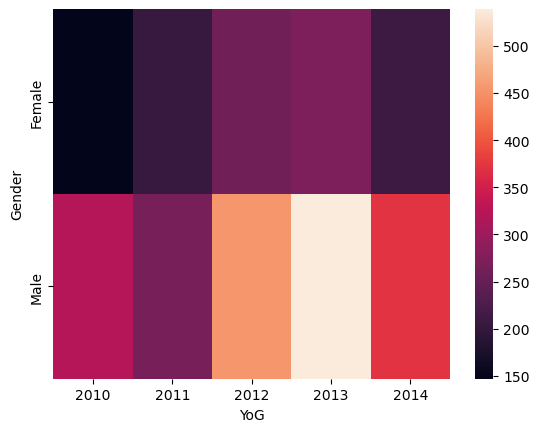

In [81]:
sns.heatmap(pd.crosstab(data['Gender'],data['YoG']))

<Axes: xlabel='Gender', ylabel='CGPA'>

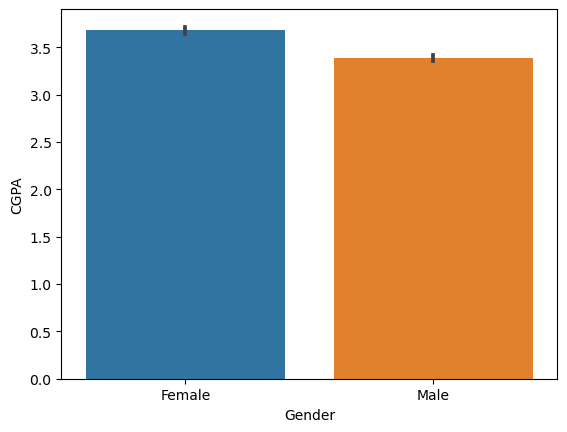

In [82]:
sns.barplot(data=data,x="Gender", y="CGPA")

<Axes: xlabel='Gender', ylabel='CGPA'>

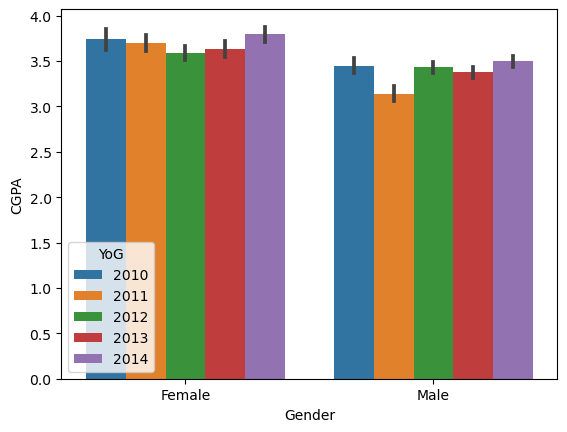

In [84]:
sns.barplot(data=data, x="Gender", y="CGPA", hue="YoG")

<Axes: xlabel='Gender', ylabel='CGPA'>

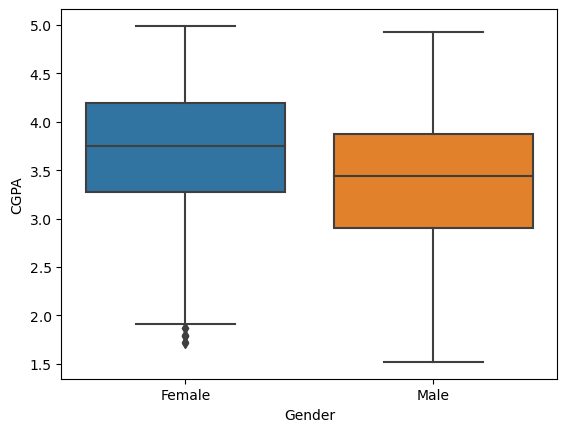

In [85]:
sns.boxplot(data=data, x="Gender", y="CGPA")

<Axes: xlabel='Gender', ylabel='CGPA'>

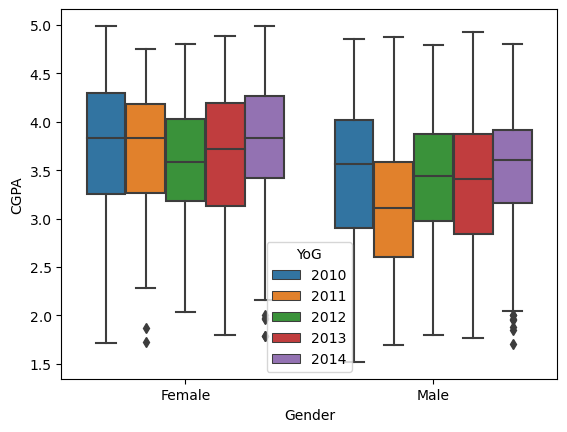

In [86]:
sns.boxplot(data=data, x="Gender", y="CGPA", hue="YoG")

<Axes: xlabel='Gender', ylabel='CGPA'>

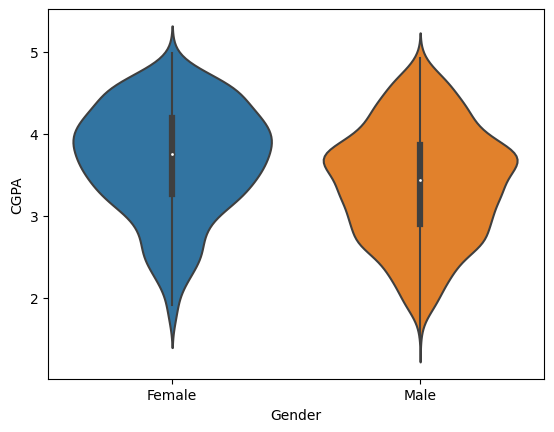

In [96]:
sns.violinplot(x='Gender', y='CGPA', data=data)

In [91]:
contigency = pd.crosstab(data['Gender'], data['YoG'])
contigency

YoG,2010,2011,2012,2013,2014
Gender,,,,,
Female,147,205,260,272,209
Male,323,266,454,539,371


In [92]:
contigency_pct = pd.crosstab(data['Gender'], data['YoG'], normalize='index')
contigency_pct

YoG,2010,2011,2012,2013,2014
Gender,,,,,
Female,0.134492,0.187557,0.237877,0.248856,0.191217
Male,0.165387,0.136201,0.232463,0.275986,0.189964


<Axes: xlabel='YoG', ylabel='Gender'>

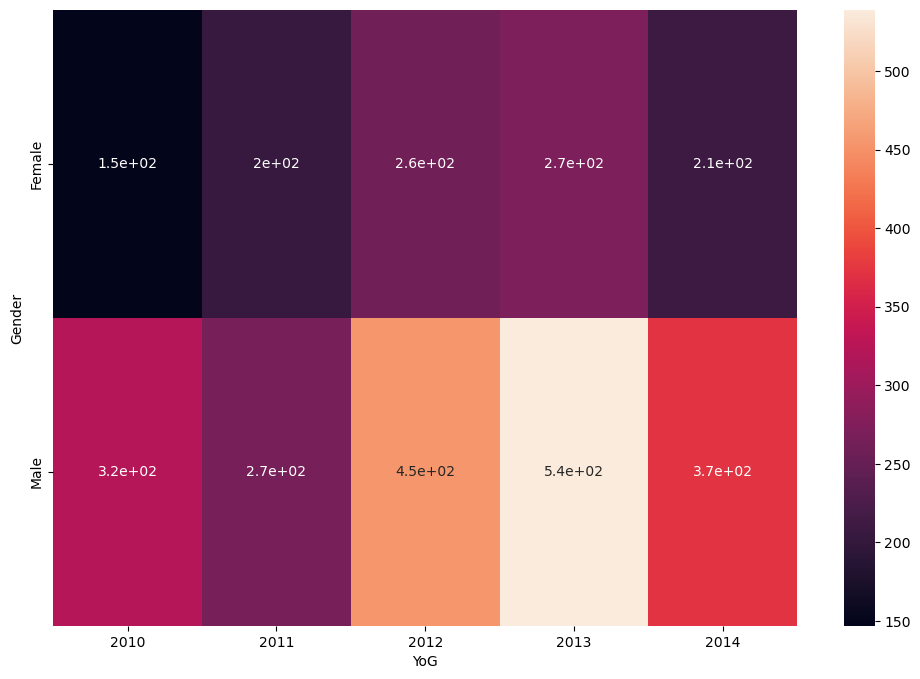

In [94]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True)

In [99]:
c, p, dof, expected = chi2_contingency(contigency) 
print(p)

0.0010689413096683763
